Polynomial Regression(다항회귀) : Regression 모델 중 X, Y의 관계가 곡선 형태(비선형)일 경우 사용할 수 있다.


### Polynomial Features
- 1차 방정식을 고차다항식으로 변경하는 기법
- sklearn.preprocessing.PolynomialFeatures 사용

In [49]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import PolynomialFeatures

import warnings
warnings.filterwarnings(action='ignore')

In [3]:
x = np.arange(6).reshape(3,2)
x

array([[0, 1],
       [2, 3],
       [4, 5]])

In [8]:
# x0, x1, x2, x1^2, x1*x2, x2^2
poly = PolynomialFeatures(2)  #degree(차수) = 2
poly.fit_transform(x)

array([[ 1.,  0.,  1.,  0.,  0.,  1.],
       [ 1.,  2.,  3.,  4.,  6.,  9.],
       [ 1.,  4.,  5., 16., 20., 25.]])

In [7]:
#interaction_only=True --> x0, x1, x2, x1*x2
poly = PolynomialFeatures(interaction_only=True)
poly.fit_transform(x)

array([[ 1.,  0.,  1.,  0.],
       [ 1.,  2.,  3.,  6.],
       [ 1.,  4.,  5., 20.]])

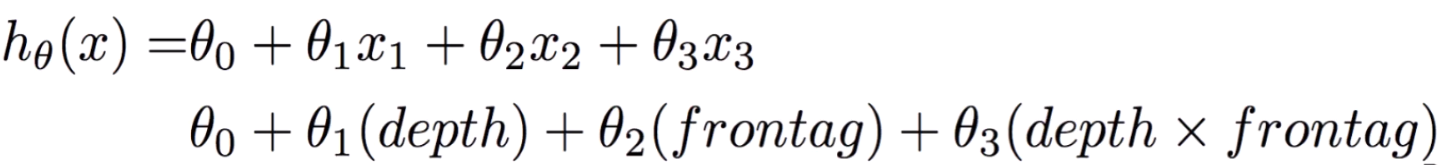

-------

In [34]:
def f(size):
    x = np.linspace(0,5,size)  #np.linspace(start, stop, num) : start부터 stop까지 균등한 간격을 가진 num개의 숫자 생성 
    y = x*np.sin(x**2) + 1
    return (x,y)

def sample(size):
    x = np.linspace(0, 5, size)  
    y = x*np.sin(x**2) + 1 + np.random.randn(x.size)*0.5  #np.random.rands : 표준정규분포에서의 난수생성
    return (x,y)

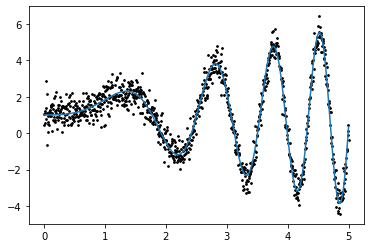

In [30]:
f_x, f_y = f(1000)
plt.plot(f_x, f_y)
X, y = sample(1000)
plt.scatter(X,y, s=3, c='black')
plt.show()

In [35]:
X.shape, y.shape

((1000,), (1000,))

## Linear regression

In [36]:
X = X.reshape(-1,1)
y = y.reshape(-1,1)
X.shape, y.shape

((1000, 1), (1000, 1))

In [38]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression()
lr.fit(X,y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

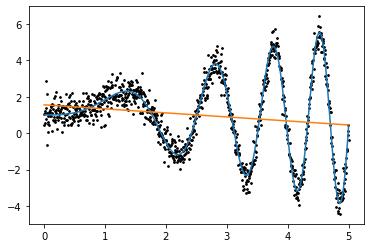

In [39]:
f_x, f_y = f(1000)
plt.plot(f_x, f_y)
plt.scatter(X.flatten(), y.flatten(), s=3, c='black')
plt.plot(X.flatten(), lr.predict(X).flatten())  #plotting해줄 때는 1-dimension으로 변경해줘야함
plt.show()

## Polynomial Regression

**언제쓸까?**  
- 한 개의 변수가 Y값과 비선형적인 관계가 있다고 의심될 때
- 주기적인 패턴을 보이는 Series 데이터
- 모델 자체가 복잡해지면 해결가능한 부분이 많음 --> SVM, Tree-based models

In [40]:
poly_features = PolynomialFeatures(degree=2)
X_poly = poly_features.fit_transform(X)
X_poly[:10]

# x0, x1, x1^2

array([[1.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [1.00000000e+00, 5.00500501e-03, 2.50500751e-05],
       [1.00000000e+00, 1.00100100e-02, 1.00200300e-04],
       [1.00000000e+00, 1.50150150e-02, 2.25450676e-04],
       [1.00000000e+00, 2.00200200e-02, 4.00801202e-04],
       [1.00000000e+00, 2.50250250e-02, 6.26251878e-04],
       [1.00000000e+00, 3.00300300e-02, 9.01802704e-04],
       [1.00000000e+00, 3.50350350e-02, 1.22745368e-03],
       [1.00000000e+00, 4.00400400e-02, 1.60320481e-03],
       [1.00000000e+00, 4.50450450e-02, 2.02905608e-03]])

In [41]:
lr = LinearRegression(fit_intercept=False) #X_poly에 절편항이 추가 되어있으므로 fit_intercept=False 해줘야함
lr.fit(X_poly, y)

LinearRegression(copy_X=True, fit_intercept=False, n_jobs=None, normalize=False)

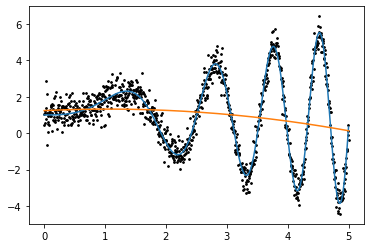

In [42]:
f_x, f_y = f(1000)
plt.plot(f_x, f_y)
plt.scatter(X.flatten(), y.flatten(), s=3, c='black')
plt.plot(X.flatten(), lr.predict(X_poly).flatten())
plt.show()

In [43]:
poly_features = PolynomialFeatures(degree=9)
X_poly = poly_features.fit_transform(X)
X_poly[:3]

array([[1.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00],
       [1.00000000e+00, 5.00500501e-03, 2.50500751e-05, 1.25375751e-07,
        6.27506263e-10, 3.14067198e-12, 1.57190790e-14, 7.86740691e-17,
        3.93764110e-19, 1.97079134e-21],
       [1.00000000e+00, 1.00100100e-02, 1.00200300e-04, 1.00300601e-06,
        1.00401002e-08, 1.00501504e-10, 1.00602106e-12, 1.00702808e-14,
        1.00803612e-16, 1.00904517e-18]])

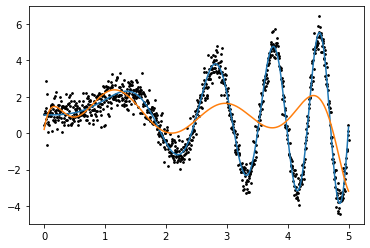

In [44]:
lr = LinearRegression(fit_intercept=False) #X_poly에 절편항이 추가 되어있으므로 fit_intercept=False 해줘야함
lr.fit(X_poly, y)
f_x, f_y = f(1000)
plt.plot(f_x, f_y)
plt.scatter(X.flatten(), y.flatten(), s=3, c='black')
plt.plot(X.flatten(), lr.predict(X_poly).flatten())
plt.show()

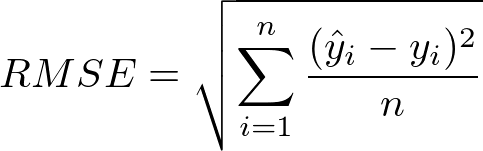

In [45]:
def rmse(predictions, targets):
    return np.sqrt(((predictions-targets)**2).mean())

### Hyperparameter Search

In [57]:
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge

poly_range = list(range(10,50))  # 10~49까지 총 40개의 features 만듦
#LR, Lasso, Ridge 세 개의 모델을 만들어서 rmse를 가장 작게 만드는 모델 찾아보기
rmse_lr_list = []
rmse_lasso_list = []  #L1
rmse_ridge_list = []  #L2

In [58]:
for poly_value in poly_range:
    poly_features = PolynomialFeatures(degree=poly_value)
    X_poly = poly_features.fit_transform(X)
    lr = LinearRegression(fit_intercept=False)
    lr.fit(X_poly, y)
    
    rmse_lr_list.append(rmse(lr.predict(X_poly),y))
    
    lasso = Lasso(fit_intercept=False)
    lasso.fit(X_poly,y)
    rmse_lasso_list.append(rmse(lasso.predict(X_poly),y))
    
    ridge = Ridge(fit_intercept=False)
    ridge.fit(X_poly,y)
    rmse_ridge_list.append(rmse(ridge.predict(X_poly),y))

In [59]:
import pandas as pd
data = {"poly_range":poly_range, "lr_rmse":rmse_lr_list, "lasso_rmse":rmse_lasso_list, "ridge_rmse":rmse_ridge_list}
df = pd.DataFrame(data).set_index("poly_range")
df

,lr_rmse,lasso_rmse,ridge_rmse
poly_range,,,
10,1.886961,2.288471,1.911794
11,1.879817,2.290534,1.893529
12,1.627207,2.290747,1.892308
13,1.356238,2.290088,1.866592
14,1.342831,2.288824,1.637463
15,0.924276,2.287370,1.542861
16,0.716116,2.285988,1.580311
17,0.685467,2.284828,1.302919
18,0.711839,2.283948,0.889750


L1 : Unstable, Always on, Sparse solution & Feature selection  
L2 : Stable, Only one, Non-sparse solution

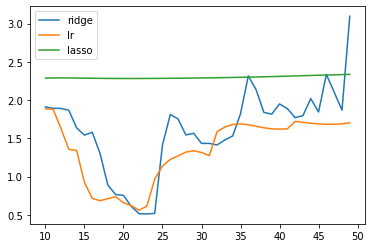

In [69]:
plt.plot(poly_range, df["ridge_rmse"], label="ridge")
plt.plot(poly_range, df["lr_rmse"], label="lr")
plt.plot(poly_range, df["lasso_rmse"], label="lasso")
plt.legend()
plt.show()

In [60]:
df.min()

lr_rmse       0.560724
lasso_rmse    2.282956
ridge_rmse    0.512811
dtype: float64

In [61]:
df['ridge_rmse'].sort_values().head()

poly_range
23    0.512811
22    0.515977
24    0.519100
21    0.610947
20    0.755637
Name: ridge_rmse, dtype: float64

In [67]:
poly_features = PolynomialFeatures(degree=22)
X_poly = poly_features.fit_transform(X)
ridge = Ridge(fit_intercept=False)
ridge.fit(X_poly,y)

Ridge(alpha=1.0, copy_X=True, fit_intercept=False, max_iter=None,
      normalize=False, random_state=None, solver='auto', tol=0.001)

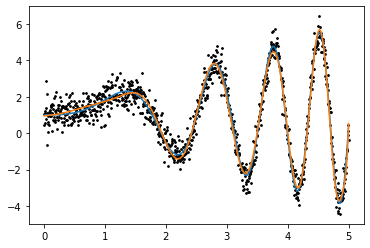

In [68]:
f_x, f_y = f(1000)
plt.plot(f_x, f_y)
plt.scatter(X.flatten(), y.flatten(), s=3, c="black")
plt.plot(X.flatten(), ridge.predict(X_poly).flatten())
plt.show()